In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
 df = pd.read_csv('dataset/IoTPond10.csv')
 display(df.head())

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
0,2021-06-25 15:48:59 CET,1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
1,2021-06-25 15:49:19 CET,2,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2,2021-06-25 15:50:16 CET,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
3,2021-06-25 15:51:50 CET,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
4,2021-06-25 15:52:10 CET,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


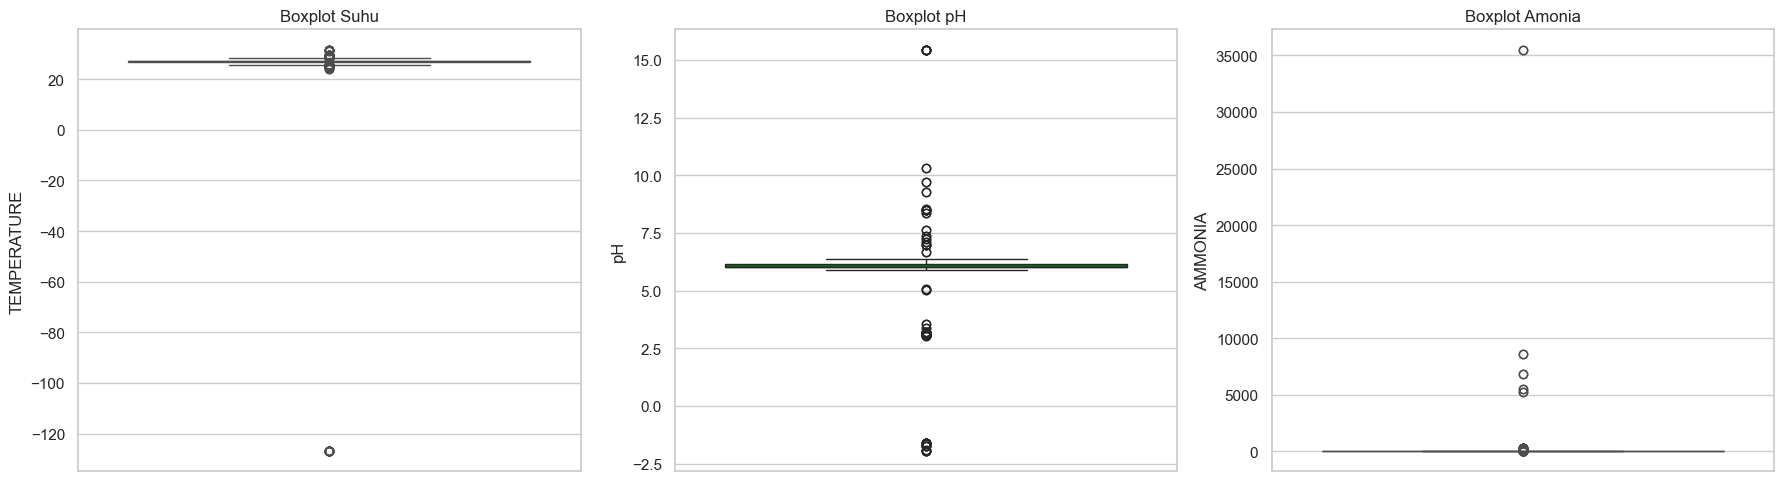

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(ax=axes[0], y=df['TEMPERATURE'], color='orange')
axes[0].set_title('Boxplot Suhu')

sns.boxplot(ax=axes[1], y=df['pH'], color='green')
axes[1].set_title('Boxplot pH')

sns.boxplot(ax=axes[2], y=df['AMMONIA'], color='red')
axes[2].set_title('Boxplot Amonia')

plt.tight_layout()
plt.show()

In [5]:
df_clean = df.replace([-127, -97, np.inf, -np.inf], np.nan)
df_clean = df_clean.dropna()
df_clean = df[
    (df['TEMPERATURE'] > 0) &      
    (df['pH'] > 0) &               
    (df['pH'] < 14) &              
    (df['AMMONIA'] >= 0) &         
    (df['AMMONIA'] < 5.0)          
].copy()

print(f"Sisa data bersih: {len(df_clean)} baris (Dibuang {len(df) - len(df_clean)} baris error)")

display(df_clean.head())

Sisa data bersih: 519 baris (Dibuang 101 baris error)


,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
2,2021-06-25 15:50:16 CET,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
3,2021-06-25 15:51:50 CET,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
4,2021-06-25 15:52:10 CET,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6
5,2021-06-25 15:52:30 CET,6,27.2500,100,0.0,5.87339,0.0,130,50,13.45,27.6
6,2021-06-25 15:52:50 CET,7,27.2500,100,0.0,6.04135,0.0,126,50,13.45,27.6


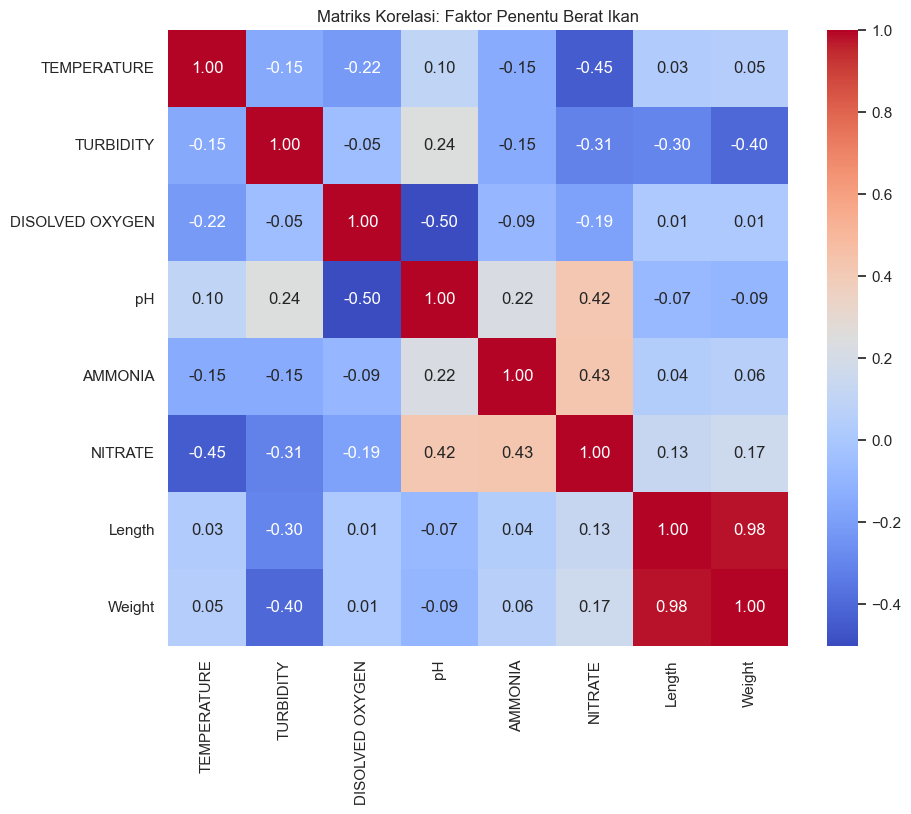

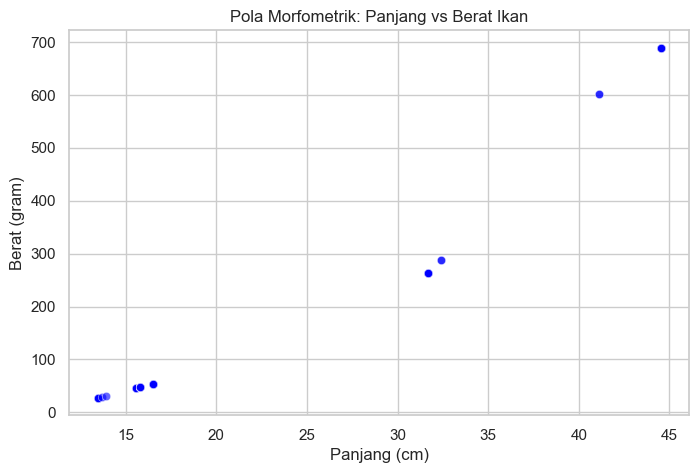

In [6]:
plt.figure(figsize=(10, 8))
cols_corr = ['TEMPERATURE','TURBIDITY','DISOLVED OXYGEN','pH','AMMONIA','NITRATE','Length','Weight']
sns.heatmap(df_clean[cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi: Faktor Penentu Berat Ikan')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='Length', y='Weight', color='blue', alpha=0.6)
plt.title('Pola Morfometrik: Panjang vs Berat Ikan')
plt.xlabel('Panjang (cm)')
plt.ylabel('Berat (gram)')
plt.show()

In [7]:
features = ['TEMPERATURE','TURBIDITY','DISOLVED OXYGEN',
            'pH','AMMONIA','NITRATE','Length','Population']

X = df_clean[features]
y = df_clean['Weight']

# Split Data (80% Latih, 20% Uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi & Latih Model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_:.4f}")

Intercept: -246.6981


In [8]:
y_pred = model.predict(X_test)

# Hitung Metrik Statistik
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score (Akurasi)  : {r2*100:.4f}%")
print(f"MAE (Rata-rata Meleset) : {mae:.4f} gram")
print(f"MSE (Error Kuadrat)    : {rmse:.4f}")


R² Score (Akurasi)  : 96.0429%
MAE (Rata-rata Meleset) : 48.9278 gram
MSE (Error Kuadrat)    : 52.7785


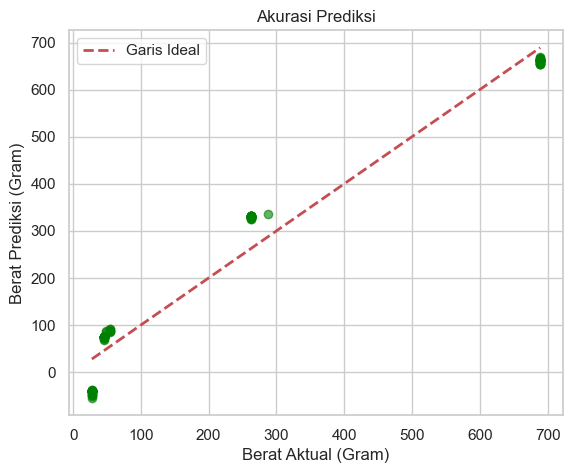

In [9]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Garis Ideal')
plt.xlabel('Berat Aktual (Gram)')
plt.ylabel('Berat Prediksi (Gram)')
plt.title('Akurasi Prediksi')
plt.legend()


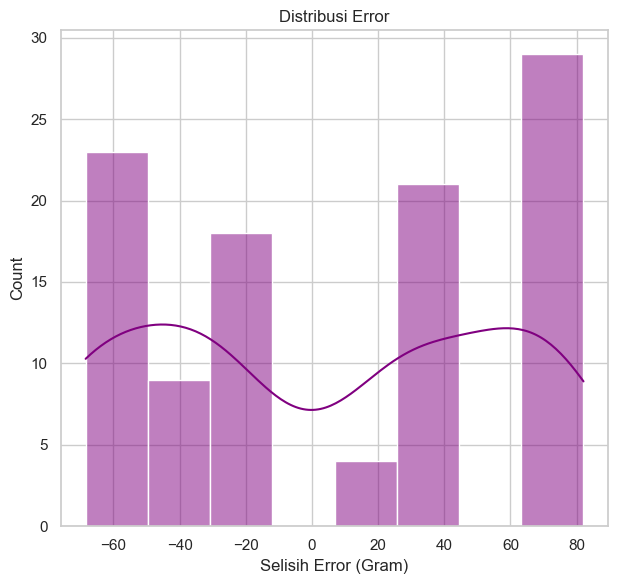

In [10]:
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribusi Error')
plt.xlabel('Selisih Error (Gram)')

plt.tight_layout()
plt.show()


In [11]:
import joblib

nama_file = 'model_estimasi_lele.pkl'

joblib.dump(model, nama_file)

print(f"Model berhasil disimpan dengan nama: {nama_file}")

Model berhasil disimpan dengan nama: model_estimasi_lele.pkl
